In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [2]:
relative_path = 'SUTD-TrafficQA-Dataset/annotations/R2_all.jsonl'
absolute_path = os.path.abspath(relative_path)

if os.path.exists(absolute_path):
    data = pd.read_json(absolute_path, lines=True)
else:
    print(f"Error: File not found at path {absolute_path}")

In [3]:
data.columns = data.iloc[0]
data = data[1:]

In [4]:
def add_word_count_column(df, column_name):
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return
    
    new_column_name = f'wordsIn{column_name}'
    df[new_column_name] = df[column_name].apply(lambda x: len(x.split()))

    sns.histplot(data=df, x=new_column_name, bins='auto', kde=False, color='blue', edgecolor='black', binwidth=1.0)

    # Add labels and title
    plt.xlabel(f'Number of Words in {column_name}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Word Counts in {column_name}')

    # Show the plot
    plt.show()

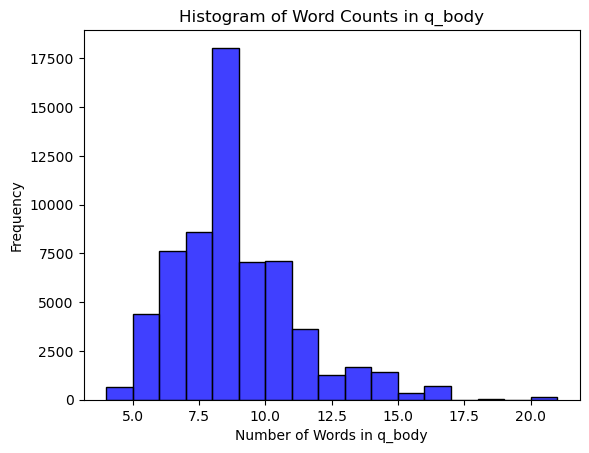

In [5]:
add_word_count_column(data, 'q_body')

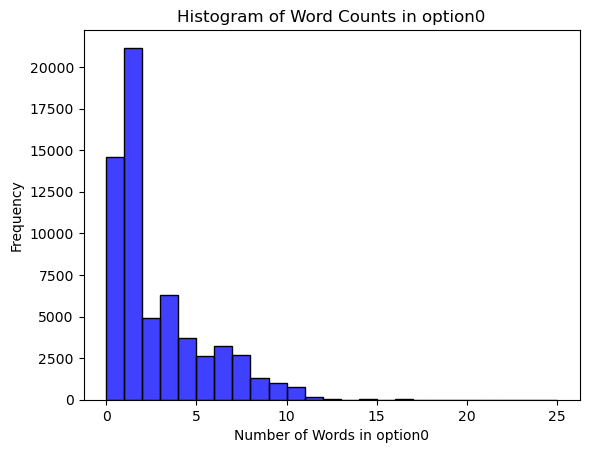

In [6]:
add_word_count_column(data, 'option0')

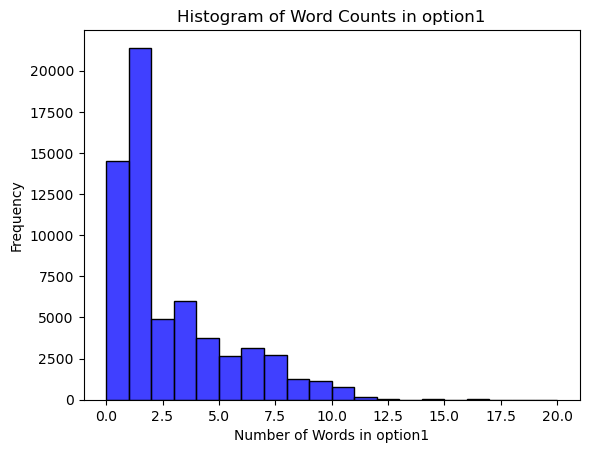

In [7]:
add_word_count_column(data, 'option1')

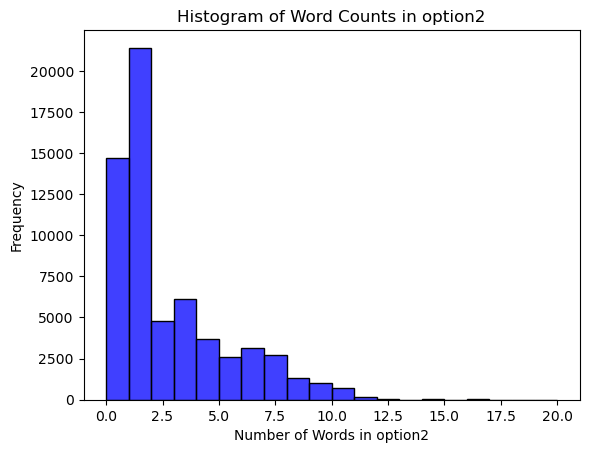

In [8]:
add_word_count_column(data, 'option2')

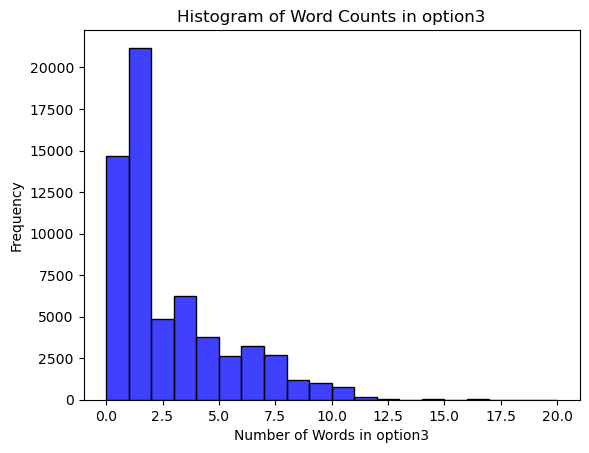

In [9]:
add_word_count_column(data, 'option3')

In [10]:
def get_duration_opencv(file_path):
    cap = cv2.VideoCapture(file_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps
    cap.release()
    return fps, frame_count, duration

def get_metadata_for_directory(directory):
    metadata_list = []
    for file_name in os.listdir(directory):
        if file_name.lower().endswith(".mp4"):
            file_path = os.path.join(directory, file_name)
            fps, frame_count, duration = get_duration_opencv(file_path)
            metadata_list.append({
                "filename": file_name,
                "fps": fps,
                "frame_count": frame_count,
                "duration": duration
            })
    df = pd.DataFrame(metadata_list)

    return df

In [11]:
metadata = get_metadata_for_directory('SUTD-TrafficQA-Dataset/raw_videos/compressed_videos')

In [12]:
metadata

,filename,fps,frame_count,duration
0,b_1B4411j7Wo_clip_013.mp4,30.000,180,6.000000
1,b_1b4411R7AX_clip_035.mp4,30.000,390,13.000000
2,b_13t411g7Z3_clip_009.mp4,30.000,180,6.000000
3,b_1U4411L75y_clip_016.mp4,25.000,125,5.000000
4,c_movi7916_14.mp4,30.000,300,10.000000
...,...,...,...,...
10075,b_16W411i73r_part1_clip_007.mp4,24.000,120,5.000000
10076,y_j8_c7fDzUbU_clip_9.mp4,23.976,335,13.972306
10077,b_1VE411a7Aa_clip_001.mp4,30.000,180,6.000000
10078,b_1hE411p7Th_clip_036.mp4,30.000,150,5.000000


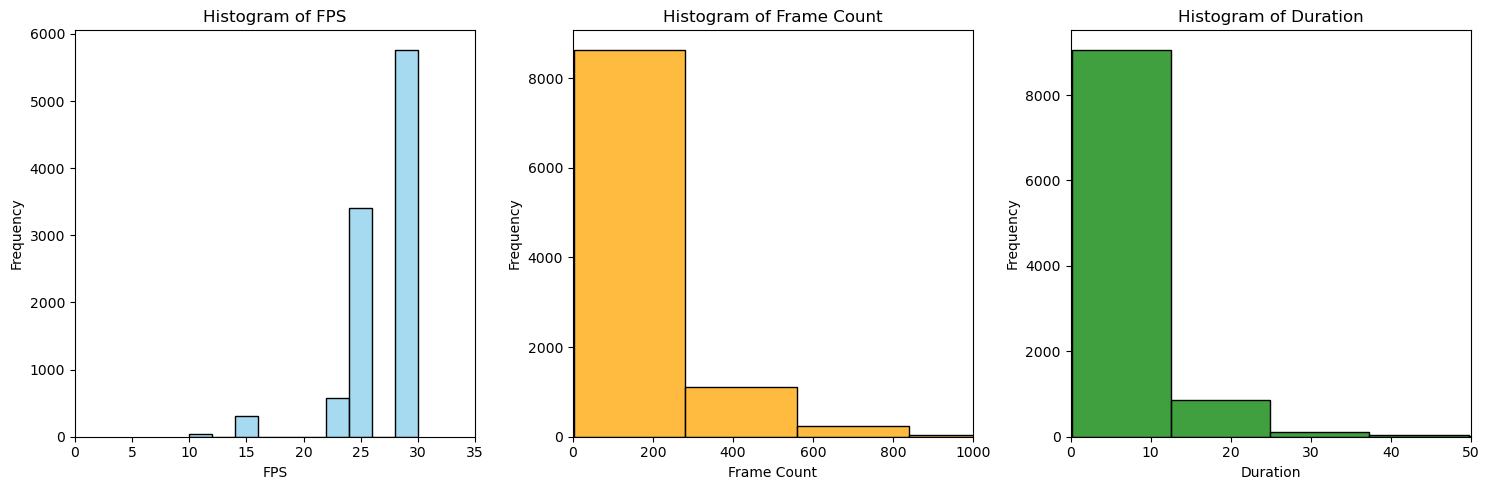

In [27]:
plt.figure(figsize=(15, 5))

# Reduce x-axis limits and adjust the number of bins to control the scale and bar width
plt.subplot(1, 3, 1)
sns.histplot(metadata['fps'], bins=10, kde=False, color='skyblue', edgecolor='black')  # bins reduced from 'auto' to 10
plt.xlim(0, 35)  # Adjust x-axis limits as needed
plt.xlabel('FPS')
plt.ylabel('Frequency')
plt.title('Histogram of FPS')

plt.subplot(1, 3, 2)
sns.histplot(metadata['frame_count'], bins=20, kde=False, color='orange', edgecolor='black')  # bins reduced from 'auto' to 20
plt.xlim(0, 1000)  # Adjust x-axis limits as needed
plt.xlabel('Frame Count')
plt.ylabel('Frequency')
plt.title('Histogram of Frame Count')

plt.subplot(1, 3, 3)
sns.histplot(metadata['duration'], bins=15, kde=False, color='green', edgecolor='black')  # bins reduced from 'auto' to 15
plt.xlim(0, 50)  # Adjust x-axis limits as needed
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')

plt.tight_layout()
plt.show()